<a href="https://colab.research.google.com/github/vismitmandlik/ML/blob/main/MlLab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


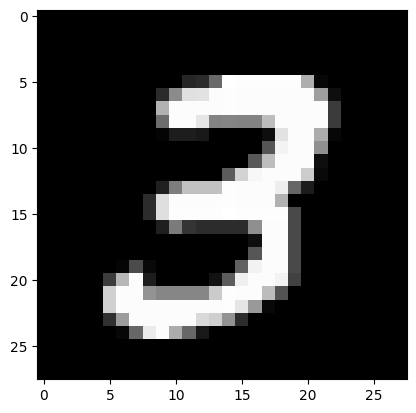

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[7,:,:].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
from keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [ ]:
y_train_encoded[7] #one-haut vector

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#Normailze the image
x_train_norm = ( x_train / 255 ) - 0.5
x_test_norm = ( x_test / 255 ) - 0.5

In [ ]:
print(x_train_norm.shape)
print(x_train[1,1,1], x_train_norm[1,1,1])

(60000, 28, 28)
0 -0.5


In [ ]:
#Flatten the image
x_train_images = x_train_norm.reshape((-1, 784))
x_test_images = x_test_norm.reshape((-1, 784))

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()

In [ ]:
model.add(Dense(64, input_dim=784, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax')) #output

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 310)               10230     
                                                                 
 dense_6 (Dense)             (None, 64)                19904     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 84,864
Trainable params: 84,864
Non-trai

In [ ]:
model.fit(x_train_images, y_train_encoded, epochs=20, batch_size=16)

Epoch 1/20
3750/3750 [==============================] - 13s 3ms/step - loss: 0.5112 - accuracy: 0.8433
Epoch 2/20
3750/3750 [==============================] - 14s 4ms/step - loss: 0.2101 - accuracy: 0.9390
Epoch 3/20
3750/3750 [==============================] - 18s 5ms/step - loss: 0.1644 - accuracy: 0.9507
Epoch 4/20
3750/3750 [==============================] - 20s 5ms/step - loss: 0.1413 - accuracy: 0.9583
Epoch 5/20
3750/3750 [==============================] - 21s 6ms/step - loss: 0.1277 - accuracy: 0.9617
Epoch 6/20
3750/3750 [==============================] - 14s 4ms/step - loss: 0.1142 - accuracy: 0.9663
Epoch 7/20
3750/3750 [==============================] - 16s 4ms/step - loss: 0.1061 - accuracy: 0.9695
Epoch 8/20
3750/3750 [==============================] - 19s 5ms/step - loss: 0.0994 - accuracy: 0.9704
Epoch 9/20
3043/3750 [=======================>......] - ETA: 2s - loss: 0.0906 - accuracy: 0.9729

In [ ]:
scores = model.evaluate(x_test_images, y_test_encoded)
print("\nAccuracy: %.2f%% " % (scores[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.1275 - accuracy: 0.9689

Accuracy: 96.89% 


In [ ]:
model.save_weights('mnistmodel.h5')
model.load_weights('mnistmodel.h5')